# Tesseract ORC
<div>
    <div class="alert alert-block alert-info" style="padding: 5px 5px 5px 5px; text-align: center; border-radius: 5px; display: inline-block;">
    Under Apache 2.0 license.
    </div>
    <div class="alert alert-block alert-warning" style="padding: 5px 5px 5px 5px; text-align: center; border-radius: 5px; display: inline-block;">
    In this example, I installed tesseract 5.3.2.
    </div>
</div>


**Outline**

1. [Introduction](#introduction)
1. [Installation](#installation)
1. [Pre-processing](#pre-processing)
1. [APIs Usage](#apis-usage)
    1. [Get String](#get-string)
    1. [Get Bounding Boxes](#get-bounding-boxes)
    1. [Get All Information](#get-all-information)
    1. [Detect Orientation and Script](#detect-orientation-and-script)
    1. [Whitelist & Blacklist Characters](#whitelist--blacklist-characters)
1. [Configurations](#configurations)
1. [Use Cases](#use-cases)
    1. [Filter Recognition Confidence](#filter-high-confidence-recognition)
    1. [Cropping](#crop)
    1. [Text Removal](#text-removal)
    1. [Text Matching](#text-matching)


## Introduction

Tesseract environment requires:
1. Tesseract engine for ORC main process (binary shared library)
2. APIs (or wrappers) to access the engine, such as CLI and `pytesseract`. `pytesseract` is APIs for Python. 


<img src="https://nanonets.com/blog/content/images/2019/11/ocr_flow.png" height=300/>

There are 2 kinds of engine:
1. ORC in 3 steps: word finding, line finding, and character classification.

<img src="https://nanonets.com/blog/content/images/2019/11/Screenshot-2019-11-19-at-19.58.23.png" height=200 />

2. LSTM, an RNN model in C++.

<img src="https://nanonets.com/blog/content/images/2019/11/Screenshot-2019-11-19-at-20.12.17.png" height=300 />


**References:**

https://tesseract-ocr.github.io/<br>
https://nanonets.com/blog/ocr-with-tesseract/<br>

## Installation

### Engine
Installation is different in different platforms.

#### MacOS
Run following command: `brew install tesseract`.

Check tersseract by following command: `tesseract --version`.

English can be recognized by default. If you want to regnognize other languages, run the below command.

`brew install tesseract --all-languages`

**References:**

https://www.oreilly.com/library/view/building-computer-vision/9781838644673/95de5b35-436b-4668-8ca2-44970a6e2924.xhtml

### Python APIs
Run following command: `pip install pytesseract`

In [1]:
import pytesseract
from pytesseract import Output
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import utils
import re


## Sample Image
Load image in gray scale because the following operations require gray scale and binary image (boolean) image.

In [2]:
filename = "imageTextN.png"
# filename = "opencv-logo-white.png"
# filename = "IMG_7534.jpg"
# filename = "IMG_7534_RM2.jpg"

In [3]:
filepath = f"sample-data/{filename}"
try:
    utils.getCvSample(filename, filepath)
except:
    assert os.path.isfile(filepath), FileNotFoundError(filepath)
print("Source image file:", filepath)

# NOTE Alternative function but somehow this does not work
# cv2.samples.findFile("smarties.png")


Source image file: sample-data/imageTextN.png


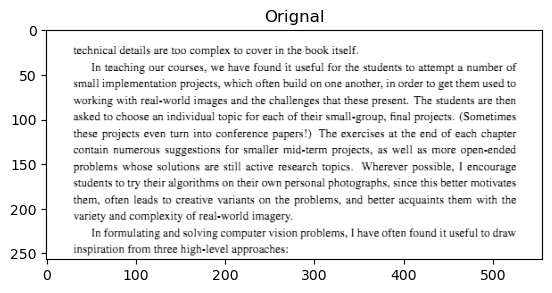

(<matplotlib.image.AxesImage at 0x145145490>, Text(0.5, 1.0, 'Orignal'), None)

In [4]:
orgImg = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
plt.imshow(orgImg, 'gray'), plt.title("Orignal"), plt.show()

## Pre-processing

To preprocess image for OCR, you may apply one or more of following operations:
- grayscale
- rescaling
- binarization
- noise removal (blur)
- deskewing (skew correction)
- thresholding
- dilation
- erosion
- opening (erosion followed by dilation)
- canny edge detection
- template matching
etc.

## APIs Usage


### Get String

In [5]:
text = pytesseract.image_to_string(orgImg)
print(text)

technical details are too complex to cover in the book itself.

In teaching our courses, we have found it useful for the students to attempt a number of
small implementation projects, which often build on one another, in order to get them used to
working with real-world images and the challenges that these present. The students are then
asked to choose an individual topic for each of their small-group, final projects. (Sometimes
these projects even turn into conference papers!) The exercises at the end of each chapter
contain numerous suggestions for smaller mid-term projects, as well as more open-ended
problems whose solutions are still active research topics. Wherever possible, I encourage
students to try their algorithms on their own personal photographs, since this better motivates
them, often leads to creative variants on the problems, and better acquaints them with the
variety and complexity of real-world imagery.

In formulating and solving computer vision problems, I have often

### Get Bounding Boxes

903


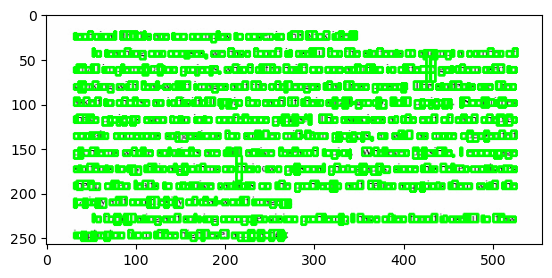

In [6]:
img = cv2.cvtColor(orgImg, cv2.COLOR_BGR2RGB)
h, w = orgImg.shape
boxes = pytesseract.image_to_boxes(orgImg) 
boxes = boxes.splitlines()
print(len(boxes))

img = cv2.cvtColor(orgImg, cv2.COLOR_GRAY2RGB)
for b in boxes:
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

plt.imshow(img)
plt.show()

### Get All Information

Including following information as keys: 
- level
- page_num
- block_num
- par_num'
- line_num
- word_num
- left
- top
- width
- height
- conf
- text

Return options by setting output_type argument with pytesseract.Output: 
- pytesseract.Output.DICT
- pytesseract.Output.BYTES
- pytesseract.Output.DATAFRAME


Number of text: 184


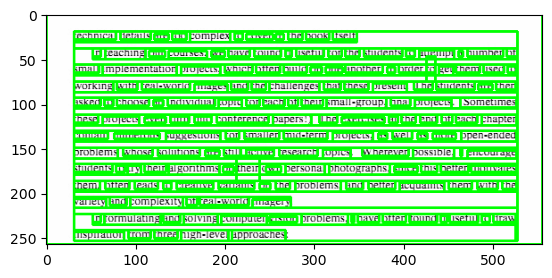

In [27]:
all_d = pytesseract.image_to_data(orgImg, output_type=Output.DICT)
print("Number of text:", len(all_d['text']))

img = cv2.cvtColor(orgImg, cv2.COLOR_BGR2RGB)
for i in range(len(all_d['text'])):
    (x, y, w, h) = (all_d['left'][i], all_d['top'][i], all_d['width'][i], all_d['height'][i])
    img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
plt.imshow(img)
plt.show()

### Detect Orientation and Script


In [8]:
# osd = pytesseract.image_to_osd(orgImg)
# angle = re.search('(?<=Rotate: )\d+', osd).group(0)
# script = re.search('(?<=Script: )\d+', osd).group(0)
# print("angle: ", angle)
# print("script: ", script)

### Whitelist & Blacklist Characters

In [9]:
# Whitelist
custom_config = r'-c tessedit_char_whitelist=abcdefghijklmnopqrstuvwxyz'
text = pytesseract.image_to_string(orgImg, config=custom_config)
print(text)


technicaldetailsaretoocomplextocoverinthebookitself

nteachingourcourseswehavefounditusefulforthestudentstoattemptanumberof
smallimplementationprojectswhichoftenbuildononeanotherinordertogetthemusedto
workingwithrealeworldimagesandthechallengesthatthesepresenthestudentsarethen
askedtochooseanindividualtopicforeachoftheirsmallgroupfinalprojectsometimes
theseprojectseventurnintoconferencepapersheexercisesattheendofeachchapter
containnumeroussuggestionsforsmallermidtermprojectsaswellasmoreopenended
problemswhosesolutionsarestillactiveresearchtopicshereverpossibleencourage
studentstotrytheiralgorithmsontheirownpersonalphotographssincethisbettermotivates
themoftenleadstocreativevariantsontheproblemsandbetteracquaintsthemwiththe
varietyandcomplexityofrealworldimagery

nformulatingandsolvingcomputervisionproblemshaveoftenfounditusefultodraw
inspirationfromthreehighelevelapproaches



In [10]:
# Blacklist
custom_config = r'-c tessedit_char_blacklist=0123456789'
text = pytesseract.image_to_string(orgImg, config=custom_config)
print(text)

technical details are too complex to cover in the book itself.

In teaching our courses, we have found it useful for the students to attempt a number of
small implementation projects, which often build on one another, in order to get them used to
working with real-world images and the challenges that these present. The students are then
asked to choose an individual topic for each of their small-group, final projects. (Sometimes
these projects even turn into conference papers!) The exercises at the end of each chapter
contain numerous suggestions for smaller mid-term projects, as well as more open-ended
problems whose solutions are still active research topics. Wherever possible, I encourage
students to try their algorithms on their own personal photographs, since this better motivates
them, often leads to creative variants on the problems, and better acquaints them with the
variety and complexity of real-world imagery.

In formulating and solving computer vision problems, I have often

## Configurations

**`--oem`**

Select OCR engine mode by using the `--oem` option with one of the following values.

0    Legacy engine only.<br>
1    Neural nets LSTM engine only.<br>
2    Legacy + LSTM engines.<br>
3    Default, based on what is available.<br>


**`--psm`**

Select page segmentation modes if you want to run OCR on only a small region or in different orientations, etc. Use the `--psm` option with one of the following values.

0    Orientation and script detection (OSD) only.<br>
1    Automatic page segmentation with OSD.<br>
2    Automatic page segmentation, but no OSD, or OCR.<br>
3    Fully automatic page segmentation, but no OSD. (Default)<br>
4    Assume a single column of text of variable sizes.<br>
5    Assume a single uniform block of vertically aligned text.<br>
6    Assume a single uniform block of text.<br>
7    Treat the image as a single text line.<br>
8    Treat the image as a single word.<br>
9    Treat the image as a single word in a circle.<br>
10    Treat the image as a single character.<br>
11    Sparse text. Find as much text as possible in no particular order.<br>
12    Sparse text with OSD.<br>
13    Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.<br>

Number of text: 5


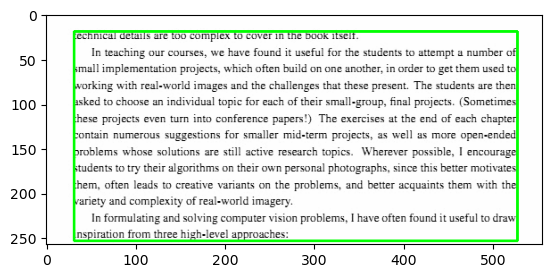

In [ ]:
custom_config = r'--oem 1 --psm 13'
all_d = pytesseract.image_to_data(orgImg, output_type=Output.DICT, config=custom_config)
print("Number of text:", len(all_d['text']))

img = cv2.cvtColor(orgImg, cv2.COLOR_BGR2RGB)
for i in range(len(all_d['text'])):
    if int(all_d['conf'][i]) > 0:
        (x, y, w, h) = (all_d['left'][i], all_d['top'][i], all_d['width'][i], all_d['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
plt.imshow(img)
plt.show()

## Use Cases

### Filter High Confidence Recognition

In [11]:
minConf = 90

Number of text from 184 to 146


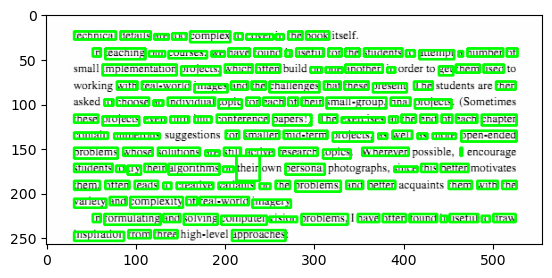

In [12]:
d = {}
for k in all_d.keys():
    d[k] = []
for i in range(len(all_d['text'])):
    if int(all_d['conf'][i]) < minConf: continue
    if str(all_d['text'][i]) == ' ': continue
    for k in d.keys():
        d[k].append(all_d[k][i])
n_boxes = len(d['text'])
print("Number of text from", len(all_d['text']), "to", n_boxes)

img = cv2.cvtColor(orgImg, cv2.COLOR_BGR2RGB)
for i in range(n_boxes):
    if int(d['conf'][i]) > 0:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
plt.imshow(img)

### Crop

In [13]:
top = 10

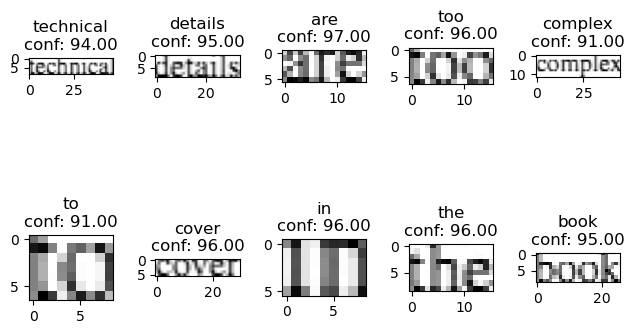

In [14]:
c = 5
r = (top // c) + 1 if top % c else top // c
for i in range(top):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
    plt.subplot(r,c,i+1)
    plt.imshow(orgImg[y:y+h, x:x+w],'gray')
    plt.title(f"{d['text'][i]}\nconf: {d['conf'][i]:.2f}")
plt.tight_layout()
plt.show()

### Text Removal

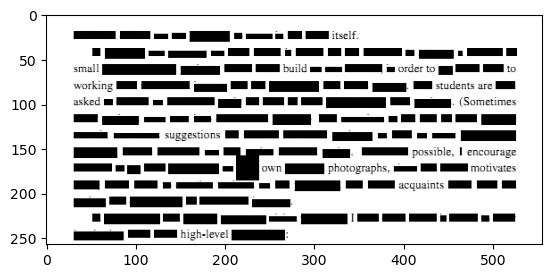

In [15]:
noTextImg = orgImg.copy()
for i in range(n_boxes):    
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
    noTextImg[y:y+h, x:x+w] = 0
plt.imshow(noTextImg, 'gray')
plt.show()

### Text Matching

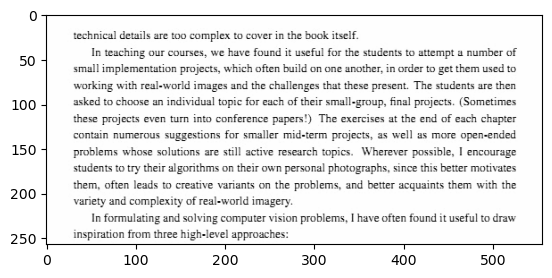

In [16]:
date_pattern = '^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$'
img = cv2.cvtColor(orgImg, cv2.COLOR_BGR2RGB)
for i in range(n_boxes):
	if re.match(date_pattern, d['text'][i]):
		(x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
		img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
plt.imshow(img)